# CNN for traffic sign  classification

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical

from helpers import load_data_from_pickle
from helpers import label_text
from helpers import unprocess_record
from helpers import print_image

from keras.utils import to_categorical
from import_notebook import load_function_from_notebook

In [2]:
#folder where data is stored
base_path = '../FDSML_data/'
#folder where the model will be stored
model_path= base_path+'models/'
#folder where images will be stored
image_path= base_path+'images/'
labels = label_text(base_path+'label_names.csv')

## Importing data

In [3]:
pickle_index = 2
x_train, y_train, x_val, y_val, x_test, y_test = load_data_from_pickle(pickle_index,base_path)
y_train = to_categorical(y_train , num_classes=43)
y_val = to_categorical(y_val, num_classes=43)

## Defining the CNN model (3x3 filter)

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(32, 32, 3))) # Input as first layer
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(500, activation='relu')) 
model.add(Dense(43, activation='softmax'))  

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,118,939 (15.71 MB)

 Trainable params: 4,118,939 (15.71 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [5]:
import time
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
# Define the learning rate function outside the LearningRateScheduler to simplify
def scheduler(epoch, lr):
    return 1e-3 * 0.95 ** (epoch + 1)

epochs = 1
annealer = LearningRateScheduler(scheduler)

if x_train is None or y_train is None or x_validation is None or y_validation is None:
    print("Data is not properly initialized.")
else:
    # If data checks out, run one epoch of the model fitting
    start_time = time.time()
    model.fit(
        x_train, y_train],
        batch_size=5,
        epochs=epochs,
        validation_data=x_val, y_val),
        callbacks=[annealer],
        verbose=1
    )
    epoch_time = time.time() - start_time
    print(f"Estimated execution time for one epoch : {epoch_time:.2f} seconds")

model.save(model_path+'model-3x3.keras')

## Testing

In [7]:
import numpy as np
from tensorflow.keras.models import load_model
model = load_model(model_path+'model-3x3.keras')
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


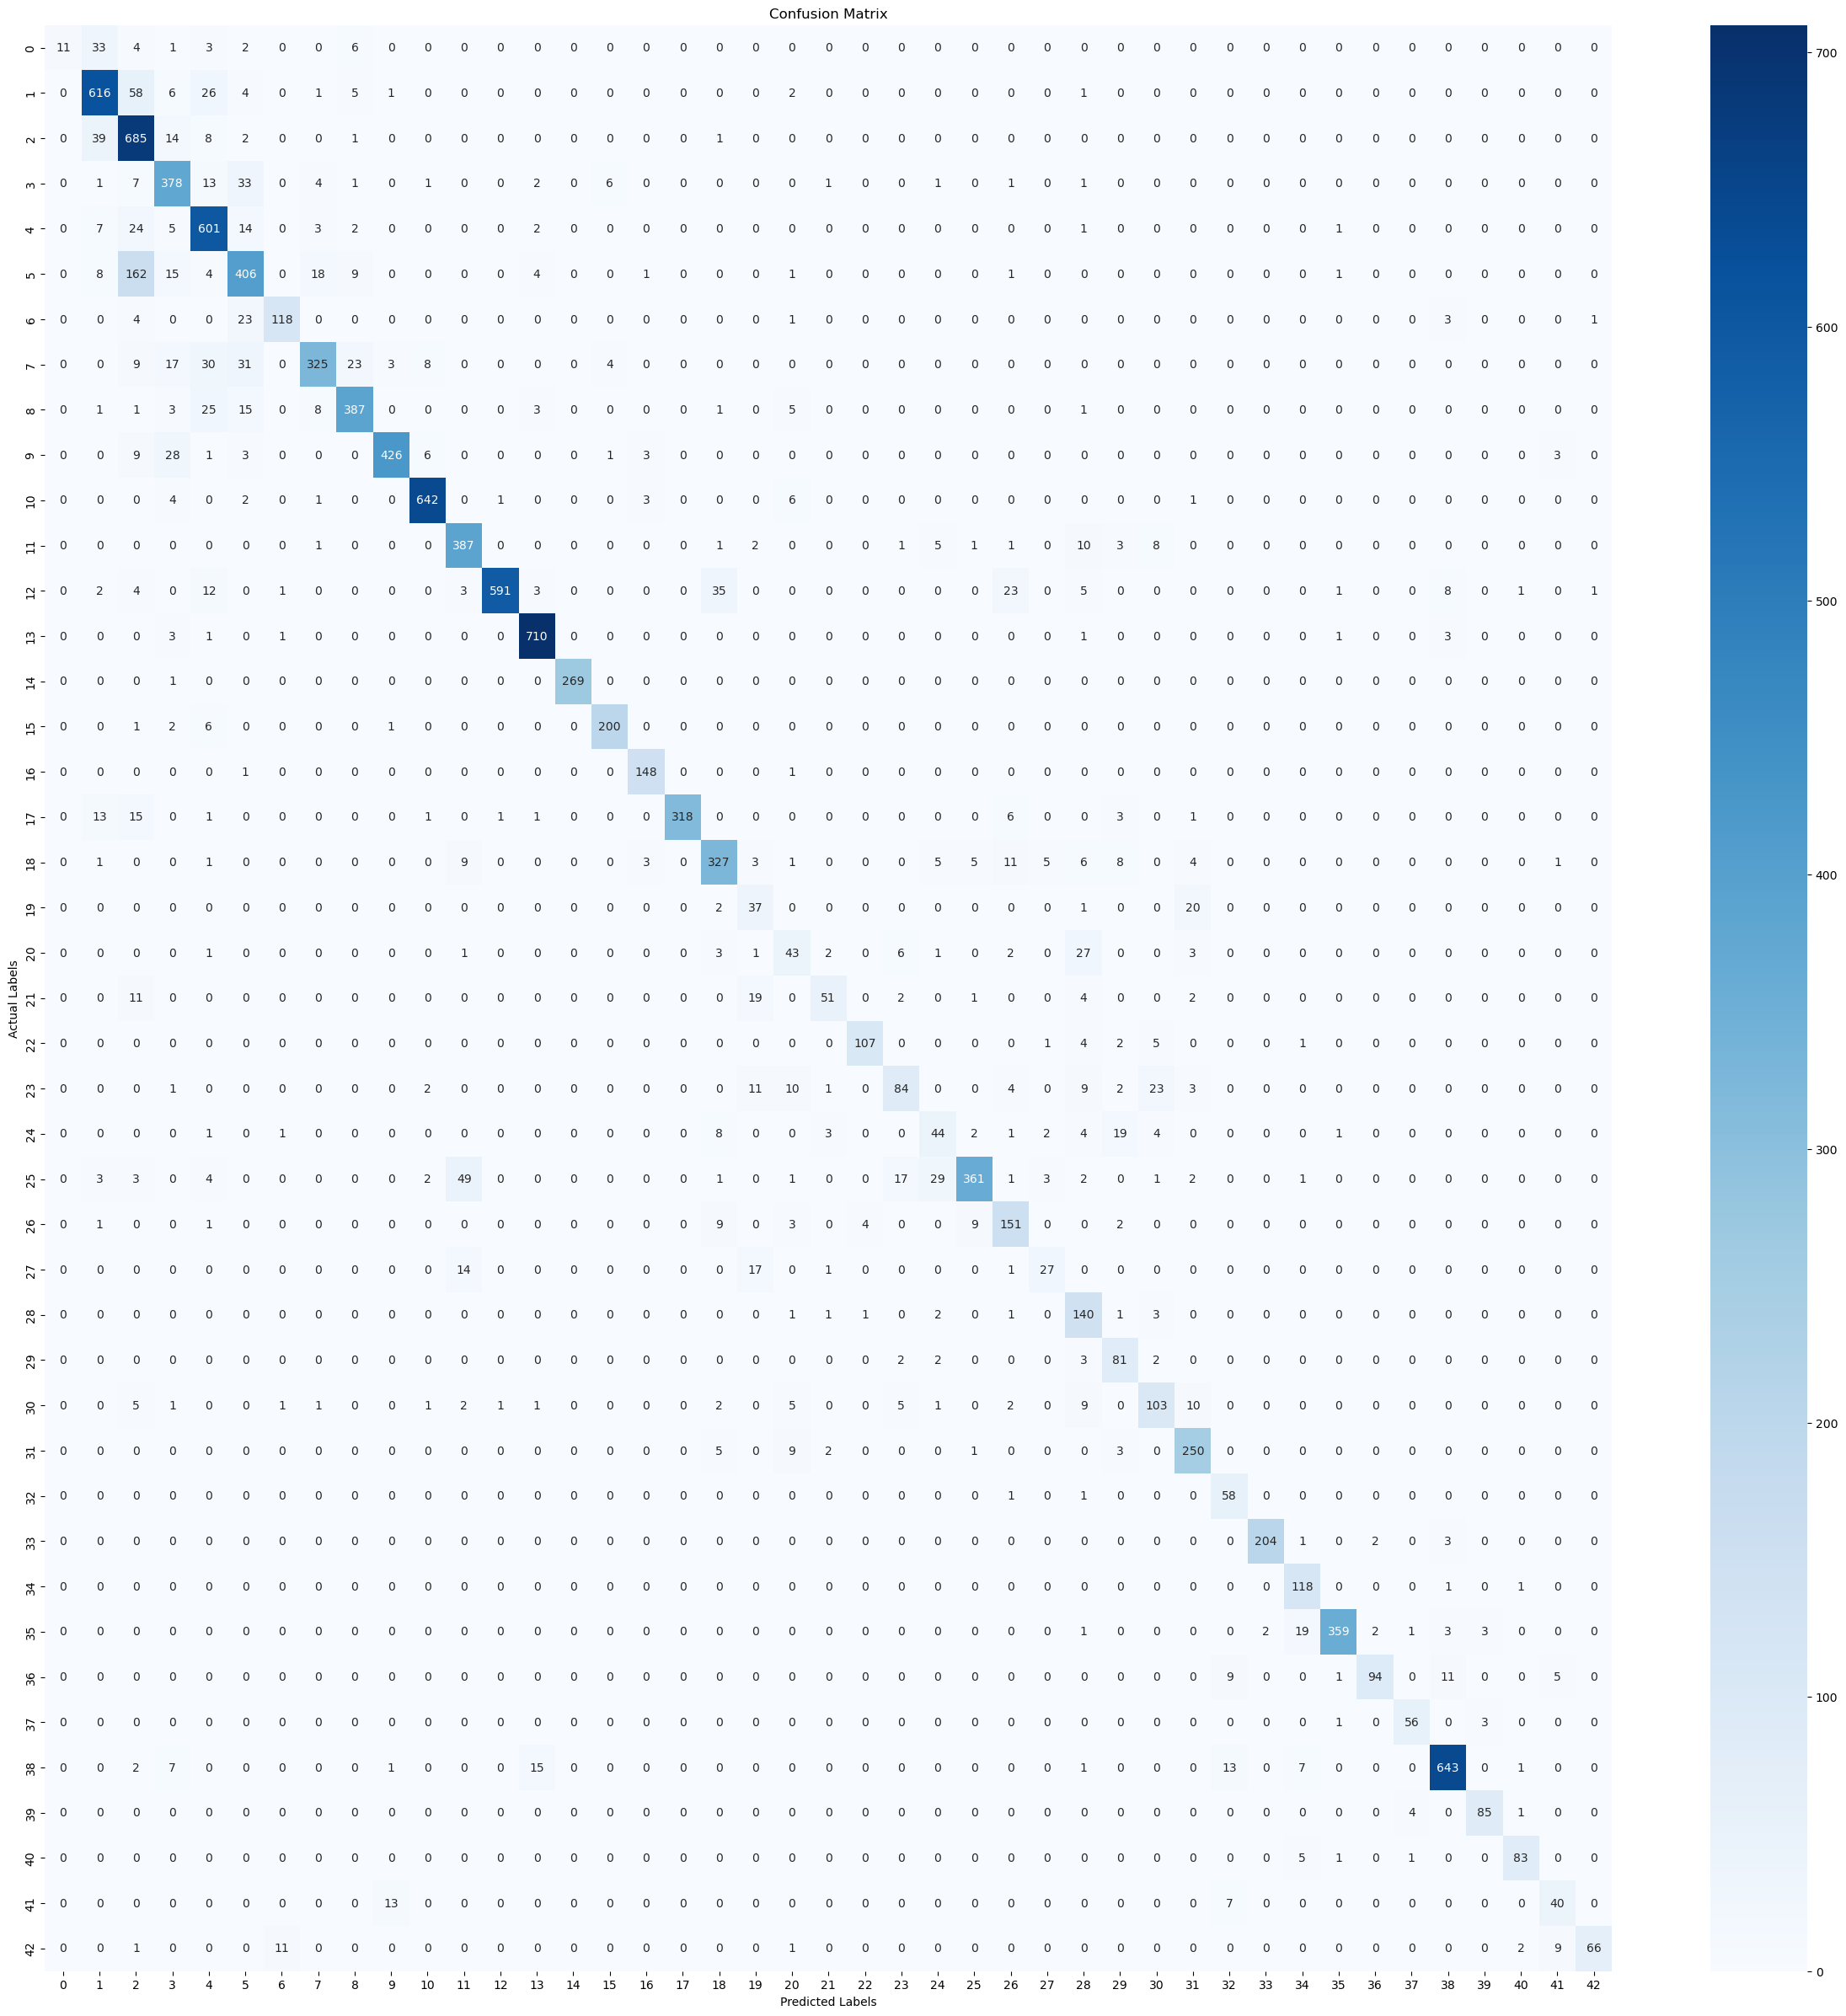

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
fig = plt.figure(figsize=(30, 30))
sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Saving the plot
fig.savefig(image_path+"og_model_conf_matrix.png")
plt.close()

In [9]:
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'{"Accuracy:":<15} {accuracy:.4f}')
print(f'{"Precision:":<15} {precision:.4f}')
print(f'{"Recall:":<15} {recall:.4f}')
print(f'{"F1 Score:":<15} {f1:.4f}')

Accuracy:       0.8575
Precision:      0.8323
Recall:         0.8103
F1 Score:       0.8084


## Example of Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


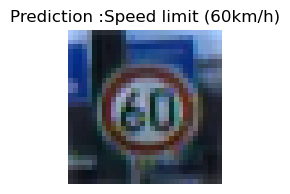

In [12]:
example = x_test[100]
scores = model.predict(np.array([example]))
prediction = np.argmax(scores)
x_input = unprocess_record(x_test[100])
print_image(x_input,"Prediction :"+labels[prediction])